# Figures 3 & 4: Profile Matches

This notebook will reproduce Figures 3 and 4 from *Heuristic Methods for Determining the Number of Classes in Unsupervised Classification of Climate Models*, E. Boland et al. 2022 (doi to follow). This requires the files model_19651995/\[ensemble member\]/\[nclass\]/avg.obj, created by running calculate_78profiles-matchingexample.ipynb.

Please attribute any plots or code from this notebook using the DOI from Zenodo: to come

Updated Nov 2022
E Atkinson & E Boland [emmomp@bas.ac.uk](email:emmomp@bas.ac.uk)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import pickle

import cluster_utils as flt

### User options
Leave as is to recreate the paper

In [2]:
# Number of classes 
classes = [7,8]
ids = ['r1i1p1f2', 'r2i1p1f2']
levs=np.load('data/levs.npy', allow_pickle=True)
model='model'

In [3]:

pcas=[]
for m_id in ids:
    with open('{}/{}/pca.obj'.format(model,m_id), 'rb') as file:
        pca=pickle.load(file)    
    pcas.append(pca)
avg_profiles = {}
avg_profiles_pca0 = {}
avg_profiles_pca1 = {}
for m_id in ids:
    avg_profiles[m_id]={}
    avg_profiles_pca0[m_id]={}
    avg_profiles_pca1[m_id]={}
    for nn,n_classes in enumerate(classes):   
        print('Loading {}'.format(m_id))
        path_data = '{}/{}/{}'.format(model,m_id, n_classes)

        with open('{}/avg_prof.obj'.format(path_data), 'rb') as file:
            avg_profiles[m_id][n_classes] = pickle.load(file)
            
        pca_data0=pcas[0].transform(np.stack([avg_profiles[m_id][n_classes][i]['mean'] for i in range(0,n_classes)]))
        pca_data1=pcas[1].transform(np.stack([avg_profiles[m_id][n_classes][i]['mean'] for i in range(0,n_classes)]))
        avg_profiles_pca0[m_id][n_classes]=[]
        avg_profiles_pca1[m_id][n_classes]=[]
        for ni in range(0,n_classes):
            avg_profiles_pca0[m_id][n_classes].append({'mean':pca_data0[ni,:]})
            avg_profiles_pca1[m_id][n_classes].append({'mean':pca_data0[ni,:]})


    print('Done!')

Loading r1i1p1f2
Loading r1i1p1f2
Done!
Loading r2i1p1f2
Loading r2i1p1f2
Done!


/srv/conda/envs/notebook/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator PCA from version 1.1.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


### Match profiles for 7 and 8 classes

[1 6 0 4 2 5 3] [1 6 0 4 5 5 3] [1 6 0 4 5 5 3]
[2 7 1 4 5 0 0 6] [2 7 1 4 5 0 0 6] [2 7 1 4 5 0 0 6]


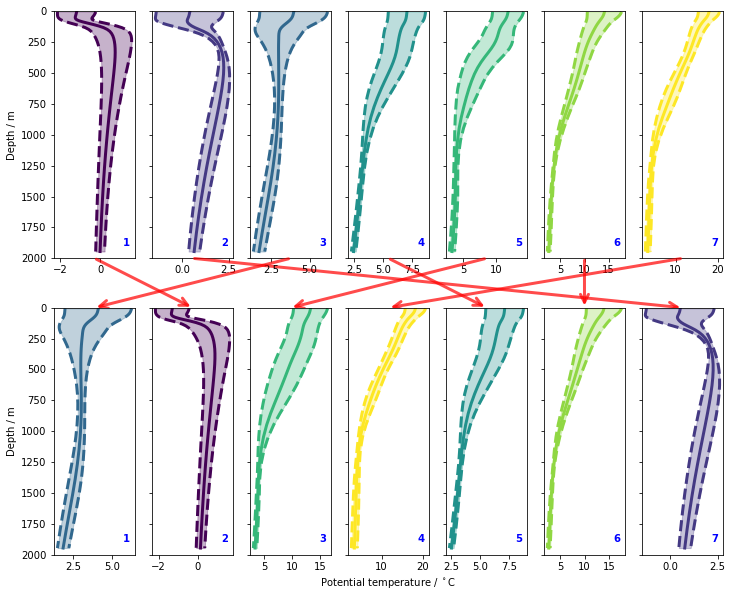

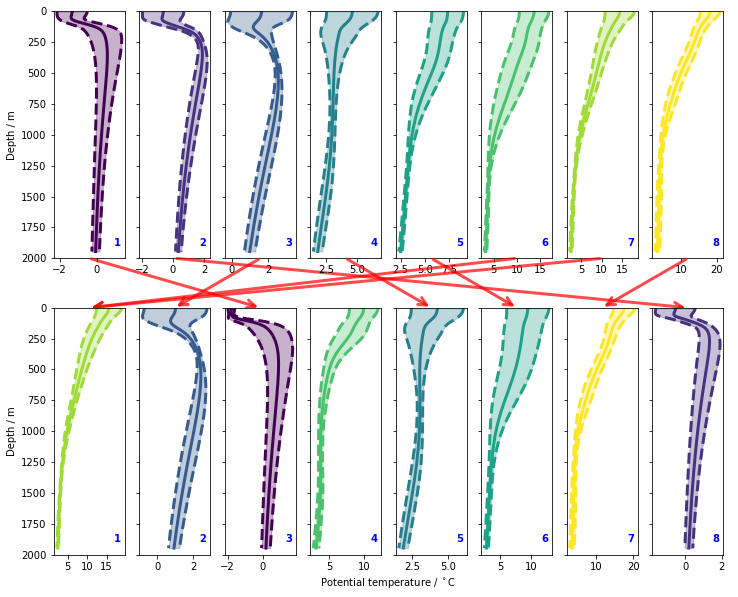

In [5]:
for n_classes in classes:
    #cmap = plt.get_cmap('RdBu_r', n_classes)
    cmap = plt.get_cmap('viridis', n_classes)
    
    figure, axes = plt.subplots(2, n_classes, sharey=True, 
                                #subplot_kw=dict(fc=[0.95,0.95,0.95]), facecolor=[0.95,0.95,0.95]
                               )
    filename='profilematching_{}classes'.format(n_classes)
    inds = flt.temp_sort(None, avg_profiles[ids[0]][n_classes], True)    
    g= flt.match_profiles([avg_profiles[ids[0]][n_classes][i] for i in inds], avg_profiles[ids[1]][ n_classes])
    inds2 = flt.temp_sort(None, avg_profiles[ids[1]][n_classes], True)  
    
    g_pca1=flt.match_profiles([avg_profiles_pca0[ids[0]][n_classes][i] for i in inds], avg_profiles_pca0[ids[1]][ n_classes])
    g_pca2=flt.match_profiles([avg_profiles_pca1[ids[0]][n_classes][i] for i in inds], avg_profiles_pca1[ids[1]][ n_classes])
    print(g,g_pca1,g_pca2)

    for (im, m_id) in enumerate(ids):
        
        for (i, ax) in enumerate(axes[im]):
            if i == 0:
                ax.set_ylabel('Depth / m')
                if im ==1:
                    ax.invert_yaxis()
         #   if i == n_classes-1:
         #       ax.annotate(m_id,xy=(1.15,0.5),xycoords=ax.transAxes,fontsize=12,fontweight='bold',\
          #                   rotation='vertical',va='center')
            ax.text(0.85,0.05,str(i+1),fontweight='bold',fontsize=10,color='b',transform=ax.transAxes)
            
            if im ==0:
                k=inds[i]
                color=cmap(i)
            else:
                k=i
                color=cmap(np.argmin(np.abs(inds2-i)))
            ax.plot(avg_profiles[m_id][n_classes][k]['mean'], levs, c=color,lw=3)
            x2 = avg_profiles[m_id][n_classes][k]['mean'] + avg_profiles[m_id][n_classes][k]['std']
            x1 = avg_profiles[m_id][n_classes][k]['mean'] - avg_profiles[m_id][n_classes][k]['std']
            ax.plot(x2, levs, c=color, ls='--',lw=3)
            ax.plot(x1, levs, c=color, ls='--',lw=3)
            ax.fill_betweenx(levs, x1, x2, color=color, alpha=0.3)
            ax.set_ylim(2000,0)

            if im==0:
                ax.annotate("",xy=(0.5,0),xytext=(0.5+1.2*(g[i]-i),-0.2),xycoords=ax.transAxes, \
                           arrowprops=dict(arrowstyle="<-",color='r',alpha=0.7,mutation_scale=20,linewidth=3))
                        
    figure.add_subplot(111, frameon=False)
    plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
    plt.xlabel('Potential temperature / ${}^\circ$C')

   # plt.suptitle('Example Profile Matching for {} Classes'.format(n_classes),fontsize=14,fontweight='bold',y=0.92)

    figure.set_size_inches(12, 10)

   # plt.savefig('figures/{}.pdf'.format(filename), dpi=300, bbox_inches='tight')

In [41]:
inds2[foo]

array([2, 7, 1, 4, 5, 3, 0, 6])

In [36]:
foo=np.arange(0,8)

In [38]:
foo

array([0, 1, 2, 3, 4, 5, 6, 7])

In [42]:
inds2

array([2, 7, 1, 4, 5, 3, 0, 6])

In [49]:
np.argmin(np.abs(inds2-0))

6

In [51]:
[np.argmin(np.abs(inds2-x)) for x in range(0,8)]

[6, 2, 0, 5, 3, 4, 7, 1]